## Data Cleaning

In [483]:
import pandas as pd

def clean_data(file_path):
    # Membaca file CSV
    df = pd.read_csv(file_path, delimiter=",")

    # Jika file testing, mengganti nama kolom sesuai yang diinginkan
    new_column_names = ['No.', 'fitur1', 'fitur2', 'fitur3', 'fitur4', 'fitur5', 'fitur6', 'fitur7', 'Kelas']
    df.columns = new_column_names

    # Mengganti tanda koma dengan titik desimal
    for column in df.columns[1:]:
        df[column] = df[column].astype(str).str.replace(',', '.')
        df[column] = df[column].str.replace(';', '')
    
    # Mengubah tipe data ke float untuk kolom fitur
    for column in df.columns[1:-1]:
        df[column] = df[column].astype(float)

    return df

# Path ke file CSV data training dan data testing
training_file_path = 'Data-AnalisisPenyakitDarah - modellingtraining.csv'
testing_file_path = 'Data-AnalisisPenyakitDarah - testing.csv'

# Membersihkan data training dan data testing
cleaned_training_data = clean_data(training_file_path)
cleaned_testing_data = clean_data(testing_file_path)

# Melanjutkan ke tahap selanjutnya dengan data yang telah dibersihkan
# Contoh: menampilkan 5 baris pertama dari data yang telah dibersihkan
print("Data Training yang telah dibersihkan:")
print(cleaned_training_data.head())

print("\nData Testing yang telah dibersihkan:")
print(cleaned_testing_data.head())

Data Training yang telah dibersihkan:
      No.  fitur1  fitur2  fitur3  fitur4  fitur5  fitur6  fitur7 Kelas
0    E541    3.78     9.0    29.4    77.7    23.8    30.7    21.1   BTT
1    D272    5.94    10.3    37.5    63.1    17.4    27.5    15.9   BTT
2    F728    5.93    10.8    34.4    58.0    18.2    31.3    16.0   BTT
3  N1,848    5.29    11.0    37.6    71.0    20.7    29.2    16.9   BTT
4   O2320    5.79    11.0    37.0    63.9    19.0    29.7    16.6   BTT

Data Testing yang telah dibersihkan:
      No.  fitur1  fitur2  fitur3  fitur4  fitur5  fitur6  fitur7 Kelas
0    D290    5.20     9.8    31.4    60.4    18.8    31.2    16.8   BTT
1  K1,164    5.26    10.9    36.4    69.2    20.8    30.1    15.5   BTT
2    F744    5.55    11.2    36.8    66.3    20.2    30.5    16.5   BTT
3    F678    6.61    11.7    38.1    57.7    17.7    30.7    16.9   BTT
4  L1,341    4.92    11.9    37.5    76.1    24.1    31.7    16.9   BTT


In [484]:
# Memisahkan fitur dan label
X_train = cleaned_training_data.drop(columns=['No.', 'Kelas'])
y_train = cleaned_training_data['Kelas']

X_test = cleaned_testing_data.drop(columns=['No.', 'Kelas'])
y_test = cleaned_testing_data['Kelas']

print(X_test)

print(y_test)

    fitur1  fitur2  fitur3  fitur4  fitur5  fitur6  fitur7
0     5.20     9.8    31.4    60.4    18.8    31.2    16.8
1     5.26    10.9    36.4    69.2    20.8    30.1    15.5
2     5.55    11.2    36.8    66.3    20.2    30.5    16.5
3     6.61    11.7    38.1    57.7    17.7    30.7    16.9
4     4.92    11.9    37.5    76.1    24.1    31.7    16.9
..     ...     ...     ...     ...     ...     ...     ...
58    5.36    11.3    37.5    70.0    21.1    30.2    17.5
59    4.99    11.6    38.9    77.8    23.3    29.9    17.4
60    4.76    12.3    38.6    81.2    25.9    31.9    14.4
61    5.38    12.9    39.6    73.7    23.9    32.5    15.1
62    5.24    13.9    41.9    80.0    26.5    33.1    14.9

[63 rows x 7 columns]
0     BTT
1     BTT
2     BTT
3     BTT
4     BTT
     ... 
58    mix
59    mix
60    mix
61    mix
62    mix
Name: Kelas, Length: 63, dtype: object


## Model Training

In [485]:
import numpy as np
import pandas as pd

def minkowski(a, b, p):
    return np.power(np.sum(np.power(np.abs(a-b), p)), 1/p)

class KNN:
    def __init__(self, p=2, k=11):
        self.p = p
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_predicted = []
        for test_row in X_test.itertuples(index=False, name=None):
            distances = self.X_train.apply(lambda row: minkowski(row.values, np.array(test_row), self.p), axis=1)
            smallest_distances = distances.nsmallest(self.k)
            indices_distances = smallest_distances.index
            classes = self.y_train[indices_distances]
            majority_class = classes.value_counts().idxmax()
            y_predicted.append(majority_class)
        return pd.Series(y_predicted)

In [486]:
# # Fungsi Jarak
# import numpy as np

# def minkowski(a, b, p) :
#     return np.power(np.sum(np.power(np.abs(a-b), p)), 1/p)

# # Reference row (first row)
# test_rows = [X_test.iloc[i] for i in range(len(X_test))] 

# # Minkowski distance parameter
# p = 2  # Example for Euclidean distance
# k = 11
# y_predicted = []
# for test_row in test_rows : 
#     distances = X_train.apply(lambda row: minkowski(row.values, test_row.values, p), axis=1)
#     smallest_distances  = distances.nsmallest(k)
#     indices_distances = smallest_distances.index
#     classes = y_train[indices_distances]
    
#     majority_class = classes.value_counts().idxmax()
#     # print(classes)
#     # print(majority_class)
#     y_predicted.append(majority_class)
#     # print(hasil)

# print(y_predicted)

# # print("Distances from the reference row:\n", distances)
# # print(reference_rows)
# # class KNN :
#     #  self.__init(dist)



## KNN dengan Manhattan Distances
Didapat dengan set $p = 1$

In [487]:
# Example usage
# X_train, y_train, X_test should be pandas DataFrames or Series
knn_mh = KNN(p=1, k=11)
knn_mh.fit(X_train, y_train)
y_pred_mh = knn_mh.predict(X_test)

print(y_pred_mh)

0      DB
1      DB
2     BTT
3     BTT
4      DB
     ... 
58     DB
59     DB
60    HbE
61    HbE
62    HbE
Length: 63, dtype: object


## KNN dengan Euclidean Distances 
Didapat dengan set $p = 2$

In [488]:
# Example usage
# X_train, y_train, X_test should be pandas DataFrames or Series
knn_ec = KNN(p=2, k=11)
knn_ec.fit(X_train, y_train)
y_pred_ec = knn_ec.predict(X_test)

print(y_pred_ec)
print(y_test)

0      DB
1      DB
2     BTT
3      DB
4      DB
     ... 
58     DB
59     DB
60     DB
61    HbE
62    HbE
Length: 63, dtype: object
0     BTT
1     BTT
2     BTT
3     BTT
4     BTT
     ... 
58    mix
59    mix
60    mix
61    mix
62    mix
Name: Kelas, Length: 63, dtype: object


## KNN dengan Minkowski Distances p=3
Didapat dengan set $p = 3$

In [489]:
# Example usage
# X_train, y_train, X_test should be pandas DataFrames or Series
knn_m3 = KNN(p=3, k=11)
knn_m3.fit(X_train, y_train)
y_pred_m3 = knn_m3.predict(X_test)

print(y_pred_m3)

0      DB
1      DB
2      DB
3      DB
4      DB
     ... 
58     DB
59     DB
60     DB
61    HbE
62    HbE
Length: 63, dtype: object


## Evaluasi

In [490]:
# Function to evaluate the model
def evaluate_model(y_pred, y_test):
    classes = np.unique(y_test)
    accuracy = np.mean(y_pred == y_test)
    
    precision = []
    recall = []
    f1_score = []
    
    for cls in classes:
        true_positive = np.sum((y_pred == cls) & (y_test == cls))
        false_positive = np.sum((y_pred == cls) & (y_test != cls))
        false_negative = np.sum((y_pred != cls) & (y_test == cls))
        
        cls_precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
        cls_recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
        cls_f1_score = 2 * (cls_precision * cls_recall) / (cls_precision + cls_recall) if (cls_precision + cls_recall) > 0 else 0
        
        precision.append(cls_precision)
        recall.append(cls_recall)
        f1_score.append(cls_f1_score)
    
    precision = np.mean(precision)
    recall = np.mean(recall)
    f1_score = np.mean(f1_score)
    
    return accuracy, precision, recall, f1_score

In [491]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to compute the confusion matrix
def confusion_matrix(y_true, y_pred):
    classes = np.unique(y_true)
    matrix = np.zeros((len(classes), len(classes)), dtype=int)
    
    for i in range(len(y_true)):
        actual_class = np.where(classes == y_true[i])[0][0]
        predicted_class = np.where(classes == y_pred[i])[0][0]
        matrix[actual_class, predicted_class] += 1
    
    return matrix, classes

# Fungsi untuk menampilkan confusion matrix
def plot_confusion_matrix(matrix, classes):
    plt.figure(figsize=(7, 4))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [492]:
# Evaluate KNN with Manhattan distance
accuracy_mh, precision_mh, recall_mh, f1_score_mh = evaluate_model(y_pred_mh, y_test)
matrix_mh, classes_mh = confusion_matrix(y_test, y_pred_mh)

# Evaluate KNN with Euclidean distance
accuracy_ec, precision_ec, recall_ec, f1_score_ec = evaluate_model(y_pred_ec, y_test)
matrix_ec, classes_ec = confusion_matrix(y_test, y_pred_ec)

# Evaluate KNN with Minkowski distance (p=3)
accuracy_m3, precision_m3, recall_m3, f1_score_m3 = evaluate_model(y_pred_m3, y_test)
matrix_m3, classes_m3 = confusion_matrix(y_test, y_pred_m3)


Evaluation results for KNN with Manhattan distance:
Accuracy: 0.746031746031746
Precision: 0.603625170998632
Recall: 0.5328256302521008
F1-score: 0.5280687054880603


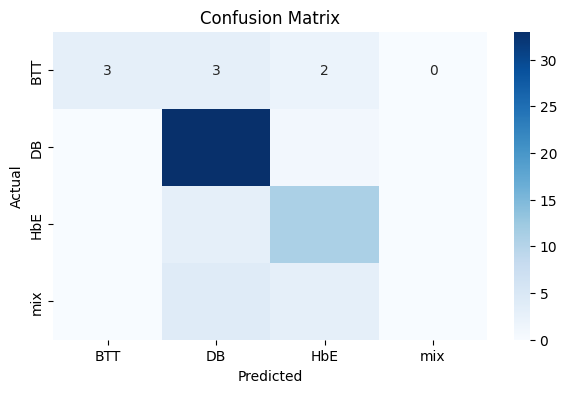

Evaluation results for KNN with Euclidean distance:
Accuracy: 0.7301587301587301
Precision: 0.6027131782945736
Recall: 0.5120798319327731
F1-score: 0.49529220779220784


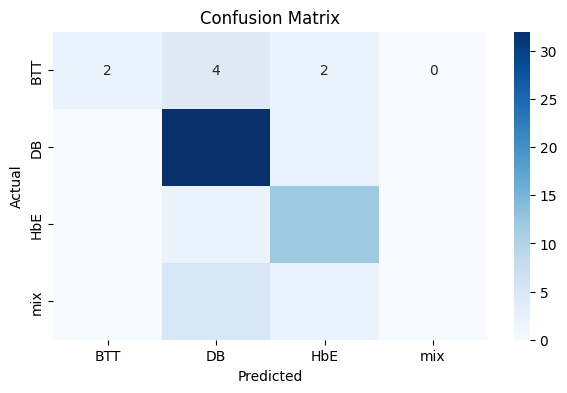


Evaluation results for KNN with Minkowski distance:
Accuracy: 0.6825396825396826
Precision: 0.3428030303030303
Recall: 0.4422268907563025
F1-score: 0.3862179487179488


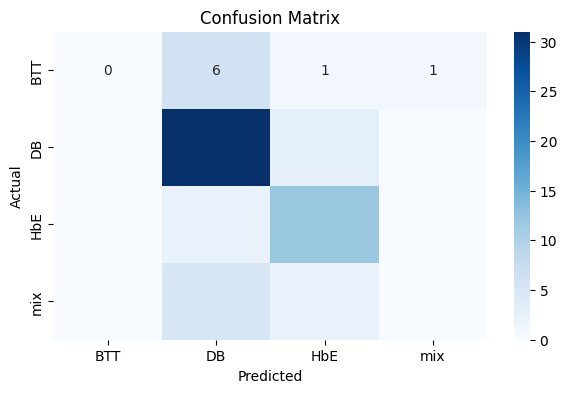

In [493]:
# Print the evaluation results and confusion matrices
print("\nEvaluation results for KNN with Manhattan distance:")
print("Accuracy:", accuracy_mh)
print("Precision:", precision_mh)
print("Recall:", recall_mh)
print("F1-score:", f1_score_mh)
plot_confusion_matrix(matrix_mh, classes_mh)

print("Evaluation results for KNN with Euclidean distance:")
print("Accuracy:", accuracy_ec)
print("Precision:", precision_ec)
print("Recall:", recall_ec)
print("F1-score:", f1_score_ec)
plot_confusion_matrix(matrix_ec, classes_ec)

print("\nEvaluation results for KNN with Minkowski distance:")
print("Accuracy:", accuracy_m3)
print("Precision:", precision_m3)
print("Recall:", recall_m3)
print("F1-score:", f1_score_m3)
plot_confusion_matrix(matrix_m3, classes_m3)

In [494]:
data = {
    "Method": ["KNN with Manhattan", "KNN with Euclidean", "KNN with Minkowski p=3"],
    "Accuracy": [accuracy_mh, accuracy_ec, accuracy_m3],
    "Precision": [precision_mh, precision_ec, precision_m3],
    "Recall": [recall_mh, recall_ec, recall_m3],
    "F1-score": [f1_score_mh, f1_score_ec, f1_score_m3]
}

df = pd.DataFrame(data)

# Menampilkan hasil evaluasi dalam bentuk tabel
df


,Method,Accuracy,Precision,Recall,F1-score
0,KNN with Manhattan,0.746032,0.603625,0.532826,0.528069
1,KNN with Euclidean,0.730159,0.602713,0.512080,0.495292
2,KNN with Minkowski p=3,0.682540,0.342803,0.442227,0.386218
